<a href="https://colab.research.google.com/github/RicardoSanch616/AF-7-Proyecto-final/blob/main/PIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

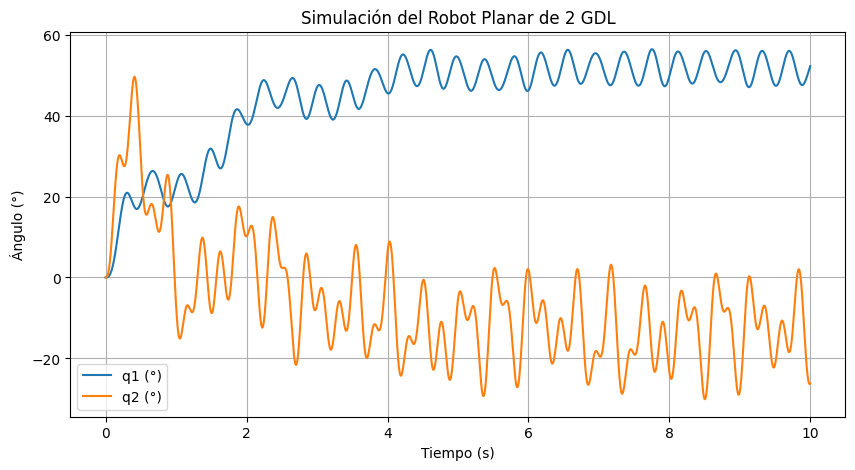

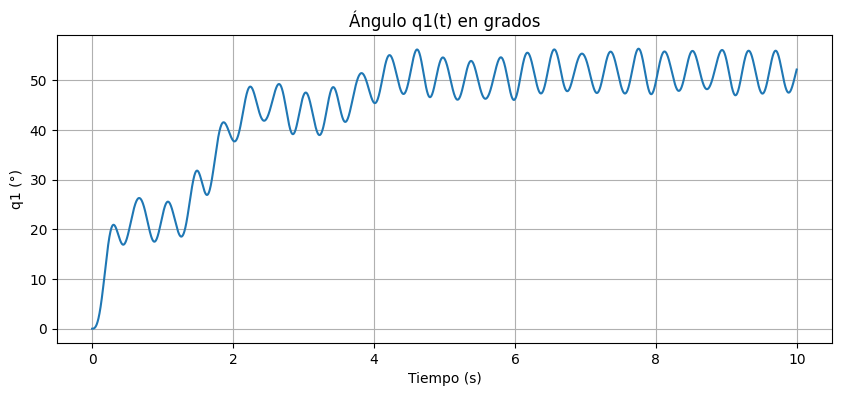

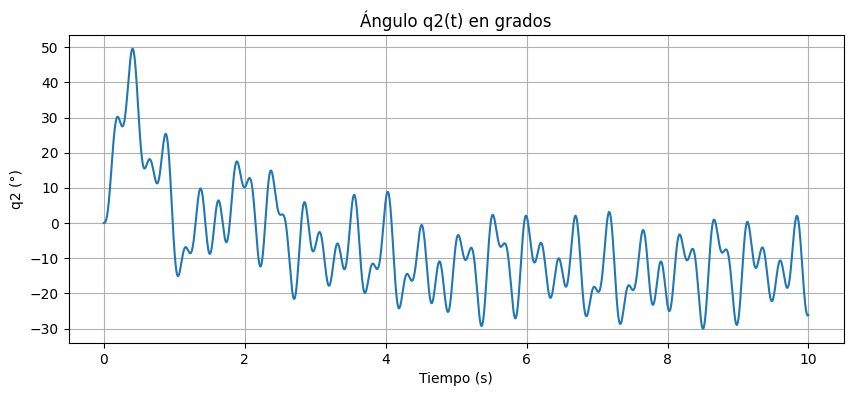

In [1]:
# ===============================================================
#  SIMULACIÓN DEL ROBOT PLANAR DE 2 GDL — LISTO PARA GOOGLE COLAB
# ===============================================================

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# DINÁMICA DEL ROBOT PLANAR DE 2 GDL
# ---------------------------------------------------------------
def robot2gdl(t, x):
    q  = x[0:2]   # posiciones articulares
    qp = x[2:4]   # velocidades articulares

    # --------------------------
    # Matriz de inercia M(q)
    # --------------------------
    M = np.array([
        [3.117 + 0.2*np.cos(q[1])*0.108 + 0.1*np.cos(q[1]),
         0.108 + 0.1*np.cos(q[1])*0.108],
        [0.108 + 0.1*np.cos(q[1])*0.108,
         0.108]
    ])

    # -------------------------------------------
    # Fuerzas de Coriolis y centrípetas C(q,qp)
    # -------------------------------------------
    C = np.array([
        [-0.2*np.sin(q[1])*qp[1] - 0.1*np.sin(q[1])*qp[1]],
        [0.1*np.sin(q[1])*qp[0]*0]
    ])

    # ------------------------------
    # Par gravitacional G(q)
    # ------------------------------
    par_grav = np.array([
        39.3*np.sin(q[0]) + 1.95*np.sin(q[0] + q[1]),
        1.95*np.sin(q[0] + q[1])
    ])

    # ------------------------------
    # Fricción viscosa F(qp)
    # ------------------------------
    fr = np.array([
        1.86*qp[0] + 1.93*np.sign(qp[0]),
        0.16*qp[1] + 0.3*np.sign(qp[1])
    ])

    # ------------------------------
    # Torque externo τ(t)
    # ------------------------------
    tau = np.array([
        (1 - np.exp(-0.8*t))*32.0 + 56*np.sin(16*t+0.1) + 12*np.sin(20*t+0.15),
        (1 - np.exp(-1.8*t))*1.2 + 8*np.sin(26*t+0.08) + 2*np.sin(12*t+0.34)
    ])

    # --------------------------------
    # Aceleraciones articulares
    # q̈ = M⁻¹ (τ - C q̇ - G - F)
    # --------------------------------
    q2p = np.linalg.inv(M) @ (tau - C.flatten()*qp - par_grav - fr)

    # ------------------------------
    # Salida del sistema
    # x = [q1 q2 q̇1 q̇2]
    # ------------------------------
    dxdt = np.array([qp[0], qp[1], q2p[0], q2p[1]])
    return dxdt

# ---------------------------------------------------------------
# SIMULACIÓN
# ---------------------------------------------------------------

ti = 0
tf = 10
h = 0.0025
t_eval = np.arange(ti, tf, h)

x0 = [0, 0, 0, 0]  # condiciones iniciales

sol = solve_ivp(robot2gdl, [ti, tf], x0, t_eval=t_eval, max_step=h)

t = sol.t
x = sol.y.T

# ---------------------------------------------------------------
# GRÁFICAS
# ---------------------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(t, np.degrees(x[:,0]), label="q1 (°)")
plt.plot(t, np.degrees(x[:,1]), label="q2 (°)")
plt.title("Simulación del Robot Planar de 2 GDL")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)")
plt.grid(True)
plt.legend()
plt.show()


# ---------------------------------------------------------------
# GRÁFICA INDIVIDUAL: q1(t)
# ---------------------------------------------------------------
plt.figure(figsize=(10,4))
plt.plot(t, np.degrees(x[:,0]))
plt.title("Ángulo q1(t) en grados")
plt.xlabel("Tiempo (s)")
plt.ylabel("q1 (°)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# GRÁFICA INDIVIDUAL: q2(t)
# ---------------------------------------------------------------
plt.figure(figsize=(10,4))
plt.plot(t, np.degrees(x[:,1]))
plt.title("Ángulo q2(t) en grados")
plt.xlabel("Tiempo (s)")
plt.ylabel("q2 (°)")
plt.grid(True)
plt.show()